### Preliminary overview

This notebook uses the data from the runs of biogeochemical model adjusted for the Wadden Sea.

In [39]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import xarray as xr
import seaborn as sns
sns.set()
register_matplotlib_converters()

#### Check surface fluxes of CO$_2$ and O$_2$

In [40]:
ds = xr.open_dataset('data/base/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
dicflux_no = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [41]:
ds = xr.open_dataset('data/with_so4/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
dicflux_so4 = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [42]:
ds = xr.open_dataset('data/with_so4_dic/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
dicflux_so4_dic = dicflux_surface.loc['2011-01-01':'2011-12-31']

In [43]:
dicflux_no = dicflux_no.reset_index(); dicflux_so4 = dicflux_so4.reset_index(); dicflux_so4_dic = dicflux_so4_dic.reset_index();

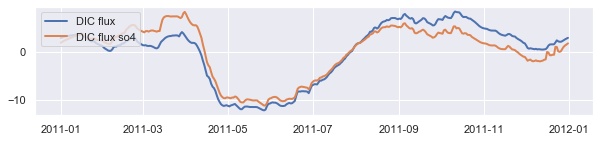

In [44]:
fig = plt.figure(figsize=(10, 2)); ax = fig.add_subplot(1, 1, 1);
ax.plot(dicflux_no['time'], dicflux_no['B_C_DIC   _flux'], linewidth=2, label=r'DIC flux');
ax.plot(dicflux_so4['time'], dicflux_so4['B_C_DIC   _flux'], linewidth=2, label=r'DIC flux so4');
#ax.plot(dicflux_so4_dic['time'], dicflux_so4_dic['B_C_DIC   _flux'], linewidth=2, label=r'DIC flux so4+dic');
ax.legend(loc='upper left');